In [33]:
from ultralytics import YOLO
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import torch
import numpy as np
import cv2
import PIL.Image as Image
import matplotlib.pyplot as plt
import os
from  detects import segany_mask_generate,yolo_mask_generate,vote_mask_generate,plot_sam_mask
#sam = sam_model_registry["vit_h"](checkpoint="./segany/sam_vit_h_4b8939.pth")
sam = sam_model_registry["vit_l"](checkpoint="./segany/sam_vit_l_0b3195.pth").to("cuda")
sam_model_generator = SamAutomaticMaskGenerator(sam,
                                                pred_iou_thresh=0.9,
                                                stability_score_thresh=0.85,
                                                crop_n_points_downscale_factor=2,
                                                crop_n_layers=2)
yolo_model = YOLO('./yolo/last.pt')

In [34]:
image = Image.open("./samples/sample5.png").convert("RGB")
yolo_masks = yolo_mask_generate(yolo_model,image)
sam_masks = segany_mask_generate(sam_model_generator,image)
voted_mask = vote_mask_generate(sam_masks,yolo_masks,threshold=0.5)


0: 640x512 1 person, 23.0ms
Speed: 2.0ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


In [36]:
#根据mask生成最终的图片,保留透明通道
image = cv2.imread("./samples/sample5.png", cv2.IMREAD_UNCHANGED)
#如果是jpg图片，需要把它转换成png图片
if image.shape[2] == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
#voted_mask取反
image[:,:,3] = (voted_mask)*255
#保存图片
cv2.imwrite("./samples/sample_masked5.png",image)

True

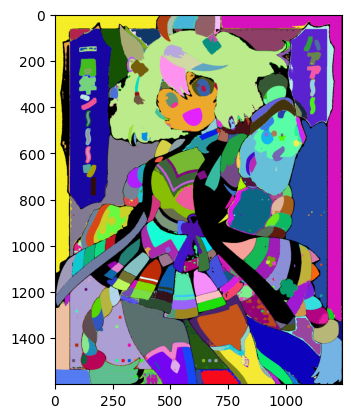

In [35]:
plt.imshow(plot_sam_mask(sam_masks))

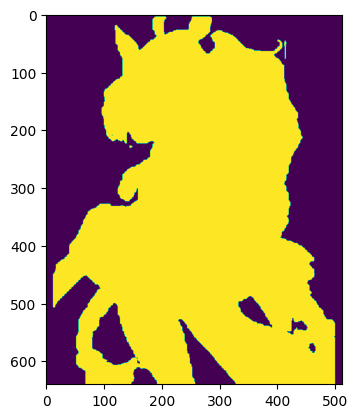

In [37]:
plt.imshow(yolo_masks)

In [ ]:
masks[0].masks.masks.data.cpu().numpy().sum(axis=0).shape